In [24]:
import numpy as np
import os 

from sklearn.linear_model import SGDClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [25]:
def get_data(): 
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    data = mnist['data']
    labels = mnist['target']
    return data, labels

In [26]:
data, labels = get_data()

In [27]:
def split_data(data, labes): 
    X_train = data[60000:]
    Y_train = labels[60000:]
    X_test = data[:60000]
    Y_test = labels[:60000]
    
    random_index = np.random.permutation(60000)
    X_train, Y_train = data[random_index], labels[random_index]
    data_dict = {'X_train':X_train, 'Y_train':Y_train, 'X_test':X_test, 'Y_test':Y_test}
    return data_dict

In [28]:
data_dict = split_data(data, labels)
data_dict.keys()

['X_test', 'X_train', 'Y_train', 'Y_test']

60000

In [32]:
SDG = SGDClassifier(random_state=14)
SDG.fit(data_dict['X_train'], data_dict['Y_train'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=14, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

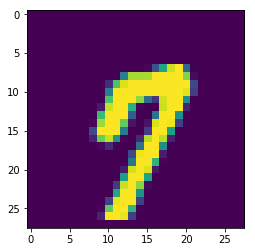

In [126]:
some_image = (data_dict['X_train'])[25]
image = some_image.reshape(28,28)
plt.imshow(image)

In [127]:
SDG.predict([some_image])

array(['7'], dtype='|S1')

In [107]:
#from sklearn.externals import joblib
#joblib.dump(SDG, 'SDG_image_classifier.pkl')

# Model Evaluation

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
print (data_dict['Y_train'])[7]

8


In [116]:
skfolds = StratifiedKFold(n_splits=3, random_state=19)
for train_index, test_index in skfolds.split(data_dict['X_train'], data_dict['Y_train']):
    clone_SDG = clone(SDG)
    x_train_folds = (data_dict['X_train'])[train_index]
    y_train_folds = (data_dict['Y_train'])[train_index]
    x_test_folds = (data_dict['X_train'])[test_index]
    y_test_folds = (data_dict['Y_train'])[test_index]
    
    clone_SDG.fit(x_train_folds, y_train_folds)
    y_pred = clone_SDG.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print n_correct/float(len(y_pred))

0.8574285142971406
0.8682934146707335
0.8676301445216783


## Confusion Matrix

In [130]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(SDG, data_dict['X_train'], data_dict['Y_train'], cv=3)

In [133]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(data_dict['Y_train'], y_train_pred)

In [149]:
import pandas as pd
pd.DataFrame(con_mat)

,0,1,2,3,4,5,6,7,8,9
0,5706,0,44,8,13,30,65,5,49,3
1,1,6402,88,18,8,12,17,21,170,5
2,83,48,5313,66,77,20,106,65,160,20
3,75,61,453,4784,25,290,53,69,274,47
4,36,37,44,12,5197,8,81,32,179,216
5,146,50,102,275,98,3978,227,34,426,85
6,44,17,93,15,65,38,5581,1,62,2
7,33,23,109,22,99,15,4,5742,86,132
8,105,183,255,114,79,165,86,20,4770,74
9,55,52,38,91,409,46,17,545,302,4394


This confusion matrix shows that 0 is wrongly classified as 2 44 times, as 3, 8 times ect.

True Positive: correctly predicted that the var was the target value
True Negative: correctly predicted that the var was not the target value
False Positive: incorrectly predicted that the var was the target value 
False Negative: incorrectly predicted that the var was not the target value.

***Precision:***
* TP/TP + FP the accuracy of the positive predictions


***Recall:***

* TP/TP+FN also known as sensitivity or true positive rate. The ratio of positive instances that are correctly detected by the classifier

In [153]:
from sklearn.metrics import precision_score, recall_score
y_train_pred.shape

(60000,)

In [155]:
data_dict['Y_train'].shape

(60000,)

In [165]:
precision_score(data_dict['Y_train'], y_train_pred, average='macro')

0.8650323279202237

In [166]:
recall_score(data_dict['Y_train'], y_train_pred, average='macro')

0.8621809849385116

This means that when the model predicts a value. it is correct 86.5% of the time. 
the recall score means it correctly indetifies 86.2% of the values. Not bad.  
<br/>
The f1 score combines both these metrics. It is the harmonic mean of precision and recall. The metric gives a much larger weight to lower values and therefore the score will only be high if both the precision and recall are high. 

In [168]:
from sklearn.metrics import f1_score 
f1_score(data_dict['Y_train'], y_train_pred, average='macro')

0.861492882109723

f1 score is high when the recall and precision are equal. This however may not always be what you want. 